In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [10]:
# Identify Nulls
df.replace(' ', np.nan)
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
# Dealing with Nulls
df['ph'].fillna(int(df['ph'].mean()), inplace=True)
df['Sulfate'].fillna(int(df['Sulfate'].mean()), inplace=True)
df['Trihalomethanes'].fillna(int(df['Trihalomethanes'].mean()), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
# Identify Duplicates
df.duplicated().sum()

0

Text(0.5, 1.0, 'Outliers')

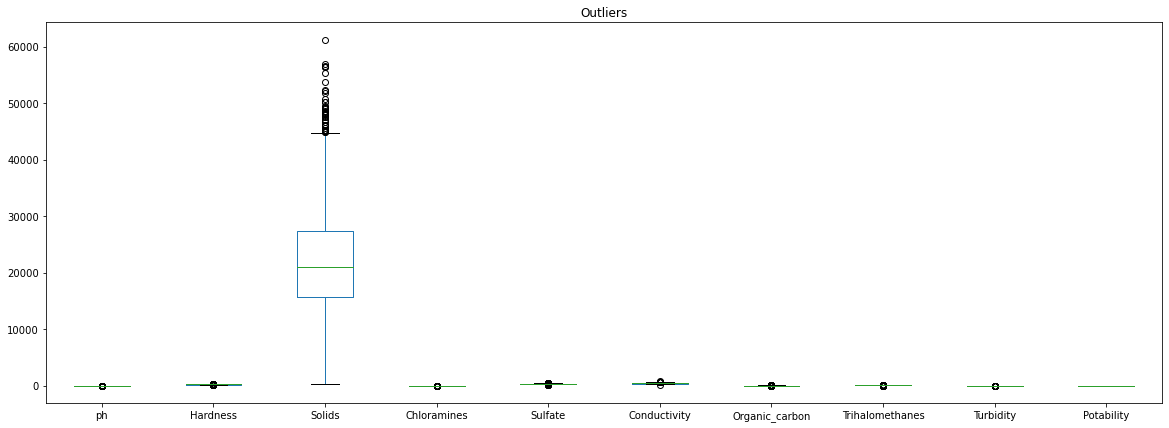

In [14]:
# Identify Outliers
outlier= df.plot(kind='box',figsize=(20,7))
plt.title('Outliers')

In [15]:
# Dealing with Outliers
num_columns = df.select_dtypes(include = ['float64']).columns.to_list()

def treat_outlier(a):
    sorted(a)
    q1,q3 = np.percentile(a,[25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    upper_fence = q3 + (1.5*iqr)
    return lower_fence,upper_fence

for i in df[num_columns].columns:
    lower_fence,upper_fence = treat_outlier(df[i])
    df[i] = np.where(df[i]>upper_fence,upper_fence,df[i])
    df[i] = np.where(df[i]<lower_fence,lower_fence,df[i])

In [16]:
# Data Prepartation (X)
X = df.drop(columns = "Potability")
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.889107,129.422921,18630.057858,6.635246,333.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.000000,392.449580,19.903225,66.000000,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.000000,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.000000,402.883113,11.168946,77.488213,4.708658


In [17]:
# Data Preparation (y)
y = df[["Potability"]]
y

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


In [18]:
# Correlation Table
cor = df.corr()['Potability'].sort_values(ascending = True)
print(cor)

Organic_carbon    -0.029282
Sulfate           -0.015489
Hardness          -0.013360
Conductivity      -0.007881
ph                -0.001441
Turbidity          0.001597
Trihalomethanes    0.007024
Chloramines        0.023523
Solids             0.031847
Potability         1.000000
Name: Potability, dtype: float64


<AxesSubplot:>

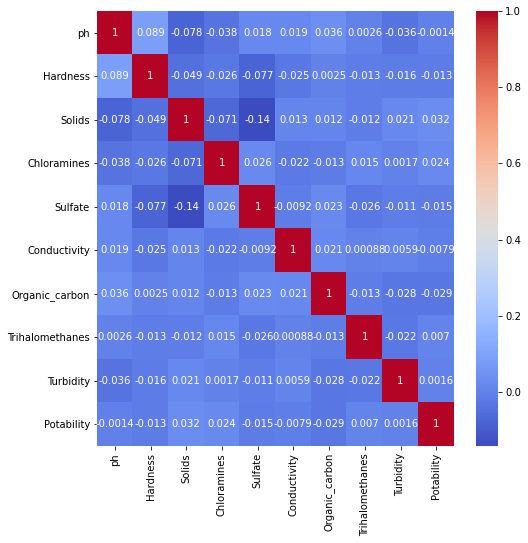

In [19]:
# Correlation Heatmap
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

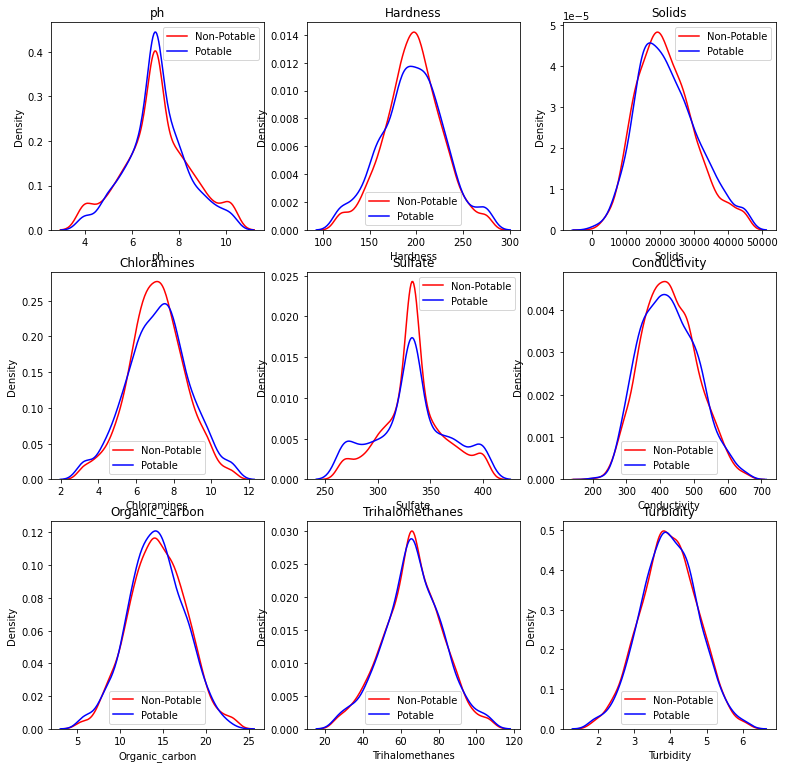

In [20]:
# Data Density Chart of features against Potability
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (13,13))
for i, columns in enumerate(df.columns[:9]):
    plt.subplot(3, 3, i+1)
    plt.title(columns)
    sns.kdeplot(x = non_potable[columns], label = "Non-Potable", color = 'red')
    sns.kdeplot(x = potable[columns], label = "Potable", color = 'blue')
    plt.legend()
plt.show()

[[<AxesSubplot:title={'center':'Potability'}>]]


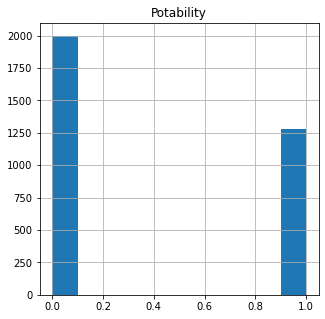

In [21]:
# Data of Potability (Histogram)
y_hist = y.hist(figsize=(5,5), layout=(1,1))
print(y_hist)

In [22]:
# Data of Potability (%)
potability_pct = y.value_counts(normalize=True)
print("Percentage of label '0' and '1' in potability column:")
print(potability_pct*100)

Percentage of label '0' and '1' in potability column:
Potability
0             60.989011
1             39.010989
dtype: float64


In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Random Forest Classifer
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Model Predictions
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

<ipython-input-23-d1be74655240>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


[1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [24]:
# Classification Report
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       391
           1       0.65      0.32      0.43       265

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.62       656



Text(0.5, 1.0, 'Feature Importance Random Forest Result')

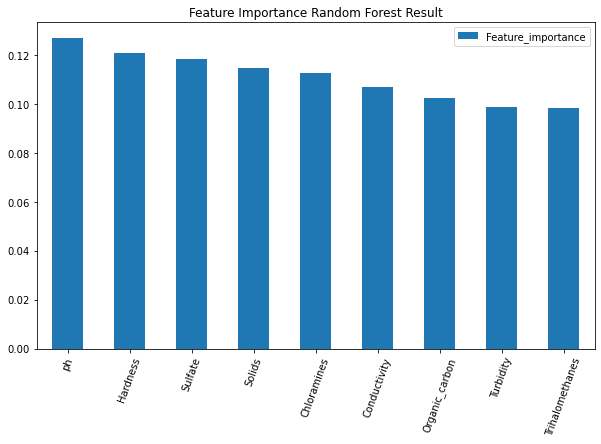

In [25]:
# Feature Importance
impt = pd.DataFrame(rf.feature_importances_, index = X.columns,  
                    columns=['Feature_importance']).sort_values('Feature_importance', 
                    ascending=False)

plt.rcParams.update({'font.size': 10})
impt.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance Random Forest Result')

NameError: name 'confusion_matrix' is not defined